<a href="https://colab.research.google.com/github/ShreeKeshavan/Customer_Conversion_Prediction/blob/main/Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
# Data Analysis & Visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    
import seaborn as sns


# Visualization modifires
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(style = 'darkgrid',font_scale=1.5)
%matplotlib inline

# To supress warnings
import warnings 
warnings.filterwarnings("ignore")   

In [238]:
df = pd.read_csv('/content/Customer_data.csv')

In [239]:
df.head(10)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,no
7,42,entrepreneur,divorced,tertiary,unknown,5,may,380,1,unknown,no
8,58,retired,married,primary,unknown,5,may,50,1,unknown,no
9,43,technician,single,secondary,unknown,5,may,55,1,unknown,no


In [240]:
# Shape of the data :
df.shape

(45211, 11)

In [241]:
# Dataframe information :
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


* From above output we can observe that 7 categorical & 4 numerical Attributes.

In [242]:
# Describing the data :
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


Handling Duplicates

In [243]:
df.duplicated().sum()

6

In [244]:
df = df.drop_duplicates()

In [245]:
df.duplicated().sum()

0

In [246]:
df.shape

(45205, 11)

* There are 6 duplicate records present in our dataset.
* I removed those 6 records

Unique Values

In [247]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [248]:
for col in df.select_dtypes(include= np.number).columns:
  print(f'{col} : {df[col].unique()}')
  print('--------------------------------------------')

age : [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
--------------------------------------------
day : [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
--------------------------------------------
dur : [ 261  151   76 ... 1298 1246 1556]
--------------------------------------------
num_calls : [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
--------------------------------------------


In [249]:
df.nunique()

age                 77
job                 12
marital              3
education_qual       4
call_type            3
day                 31
mon                 12
dur               1573
num_calls           48
prev_outcome         4
y                    2
dtype: int64

The dur column has more unique values comparing other columns

In [250]:
for col in df.select_dtypes(exclude= np.number).columns:
  print(f'{col} : {df[col].unique()}')
  print('--------------------------------------------')

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
--------------------------------------------
marital : ['married' 'single' 'divorced']
--------------------------------------------
education_qual : ['tertiary' 'secondary' 'unknown' 'primary']
--------------------------------------------
call_type : ['unknown' 'cellular' 'telephone']
--------------------------------------------
mon : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
--------------------------------------------
prev_outcome : ['unknown' 'failure' 'other' 'success']
--------------------------------------------
y : ['no' 'yes']
--------------------------------------------


In [251]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

* There are no null values currently because the null values are all filled with "unknown".

Handling Null

In [252]:
#to count the unknown values present in the dataframe 
has_unknown = df == "unknown"
columnwise_results = has_unknown.sum()
columnwise_results

age                   0
job                 288
marital               0
education_qual     1857
call_type         13017
day                   0
mon                   0
dur                   0
num_calls             0
prev_outcome      36953
y                     0
dtype: int64

In [253]:
for col in df.select_dtypes(exclude=np.number).columns:
  print(f'{col} : ')
  print(f'{df[col].value_counts()}')
  print('--------------------------------------------')

job : 
blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
--------------------------------------------
marital : 
married     27210
single      12788
divorced     5207
Name: marital, dtype: int64
--------------------------------------------
education_qual : 
secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64
--------------------------------------------
call_type : 
cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64
--------------------------------------------
mon : 
may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64
----------------

In [254]:
prev = df['prev_outcome'].value_counts()/len(df)*100
prev

unknown    81.745382
failure    10.841721
other       4.070346
success     3.342551
Name: prev_outcome, dtype: float64

In [255]:
#Nearly 37,000 of values are missing that is 81% in the prev_outcome column. It does not add any value to the data to be imputed hence we can drop this
df.drop('prev_outcome', axis=1, inplace=True)

In [256]:
for col in df.select_dtypes(include=np.number).columns:
  print(f'{col} : ')
  print(f'{df[col].value_counts().head()}')
  print('--------------------------------------------')

age : 
32    2084
31    1996
33    1972
34    1929
35    1894
Name: age, dtype: int64
--------------------------------------------
day : 
20    2752
18    2308
21    2026
17    1939
6     1932
Name: day, dtype: int64
--------------------------------------------
dur : 
124    187
90     184
89     177
104    175
122    175
Name: dur, dtype: int64
--------------------------------------------
num_calls : 
1    17542
2    12503
3     5521
4     3520
5     1764
Name: num_calls, dtype: int64
--------------------------------------------


we can fill the null value with the mode value because we are having high difference between the value counts.

In [257]:
df.replace("unknown", np.nan, inplace=True)

In [258]:
df.isnull().sum()

age                   0
job                 288
marital               0
education_qual     1857
call_type         13017
day                   0
mon                   0
dur                   0
num_calls             0
y                     0
dtype: int64

In [259]:
for col in df.columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

In [260]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
y                 0
dtype: int64

Handling Outliers

checking outliers

In [261]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [262]:
num_columns = df.select_dtypes(include=np.number).columns
num_columns

Index(['age', 'day', 'dur', 'num_calls'], dtype='object')

In [263]:
def Boxplot(col):
    plt.figure(figsize=(15, 10))
    x=1
    for i in col:
        plt.subplot(2, 2, x)
        sns.boxplot(x=i, data=df, palette='Paired')
        plt.title(f'Box plot of {i}', fontweight='black', fontsize=20, pad=20 )
        x += 1
    plt.tight_layout()
    plt.show()

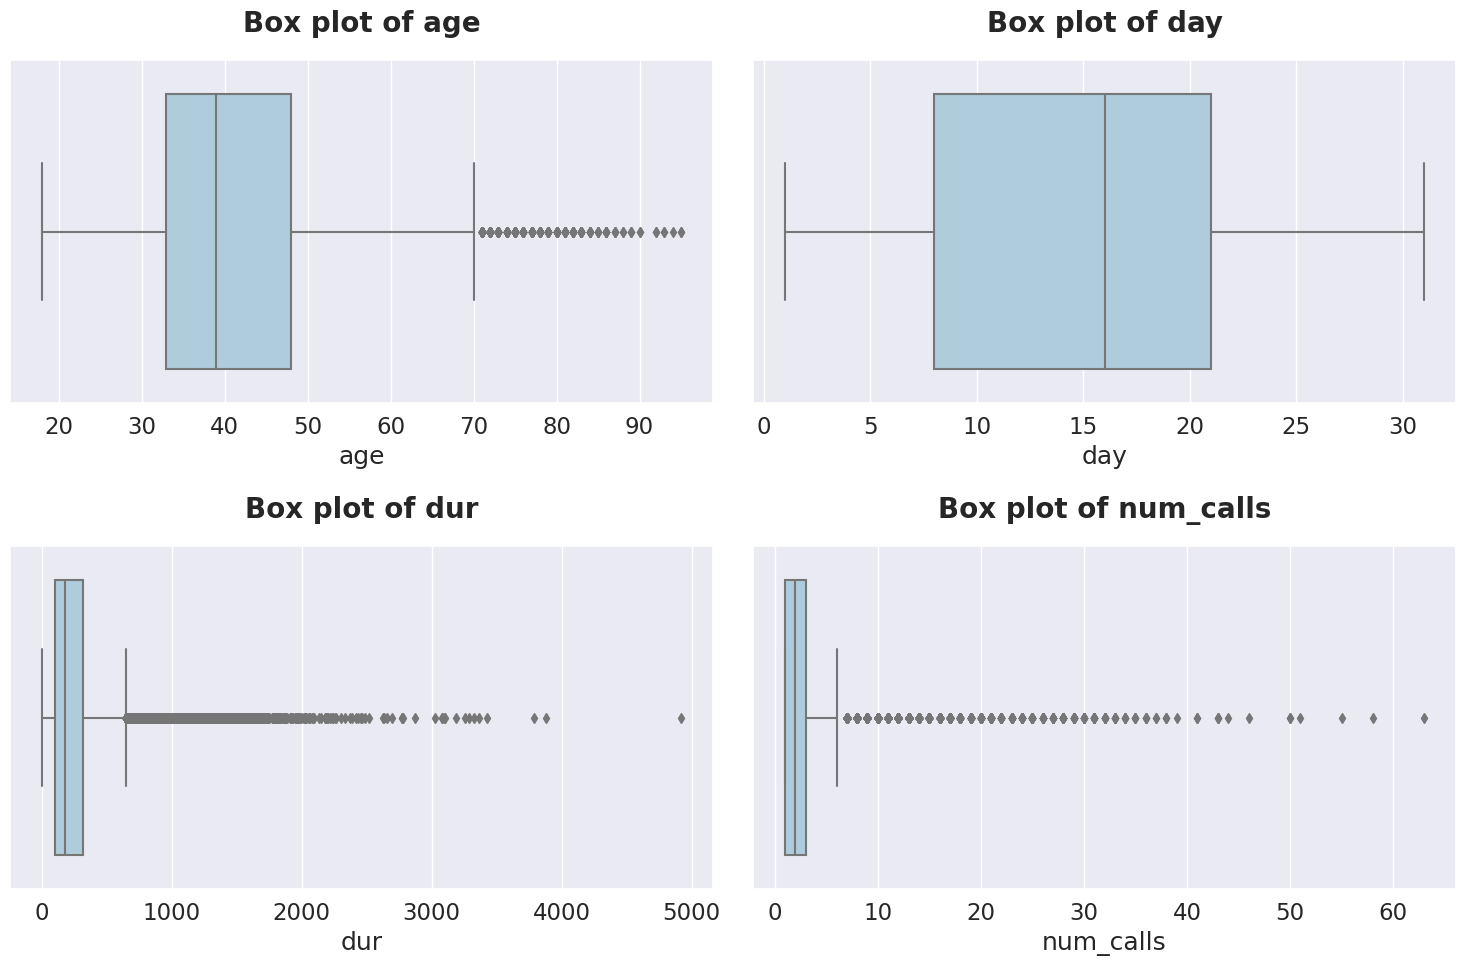

In [264]:
Boxplot(['age', 'day', 'dur', 'num_calls'])

From the box plot, we can infer the presence of outliers.

removing outliers

In [265]:
out_columns = ['age','dur', 'num_calls']
for i in out_columns:
  q1,q3 = np.percentile(df[i],[25,75])
  IQR =  q3 - q1 #(75 - 25)
  Upper = q3 + 1.5 * IQR  #(75 + 1.5 * IQR)
  Lower = q1 + 1.5 * IQR  #(75 + 1.5 * IQR)
  print(f'{i} = IQR : {IQR}, Lower Threshold : {Lower}, Upper Threshold : {Upper}')

age = IQR : 15.0, Lower Threshold : 55.5, Upper Threshold : 70.5
dur = IQR : 216.0, Lower Threshold : 427.0, Upper Threshold : 643.0
num_calls = IQR : 2.0, Lower Threshold : 4.0, Upper Threshold : 6.0


In [266]:
out_columns = ['age', 'dur', 'num_calls']

IQR_value = []
Lower_Threshold = []
Upper_Threshold = []

for i in out_columns:
  q1,q3 = np.percentile(df[i],[25,75])

  IQR =  q3 - q1 #(75 - 25)
  IQR_value.append(IQR)

  Lower = q1 - 1.5 * IQR  #(75 - 1.5 * IQR)
  Lower_Threshold.append(Lower)

  Upper = q3 + 1.5 * IQR  #(75 + 1.5 * IQR)
  Upper_Threshold.append(Upper)

out = {'Column name' : out_columns, 'IQR' : IQR_value, 'Lower Threshold' : Lower_Threshold, 'Upper Threshold' : Upper_Threshold}
out_df = pd.DataFrame(out)
out_df

,Column name,IQR,Lower Threshold,Upper Threshold
0,age,15.0,10.5,70.5
1,dur,216.0,-221.0,643.0
2,num_calls,2.0,-2.0,6.0


Cliping outliers

In [267]:
out_columns = ['age', 'day', 'dur', 'num_calls']

IQR_value = []
Lower_Threshold = []
Upper_Threshold = []

for i in out_columns:
  q1,q3 = np.percentile(df[i],[25,75])

  IQR =  q3 - q1 #(75 - 25)
  IQR_value.append(IQR)

  Lower = q1 - 1.5 * IQR  #(75 - 1.5 * IQR)
  Lower_Threshold.append(Lower)

  Upper = q3 + 1.5 * IQR  #(75 + 1.5 * IQR)
  Upper_Threshold.append(Upper)
  df[i] = df[i].clip(Lower,Upper)
out = {'Column name' : out_columns, 'IQR' : IQR_value, 'Lower Threshold' : Lower_Threshold, 'Upper Threshold' : Upper_Threshold}
out_df = pd.DataFrame(out)
out_df

,Column name,IQR,Lower Threshold,Upper Threshold
0,age,15.0,10.5,70.5
1,day,13.0,-11.5,40.5
2,dur,216.0,-221.0,643.0
3,num_calls,2.0,-2.0,6.0


checking outliers after clipping

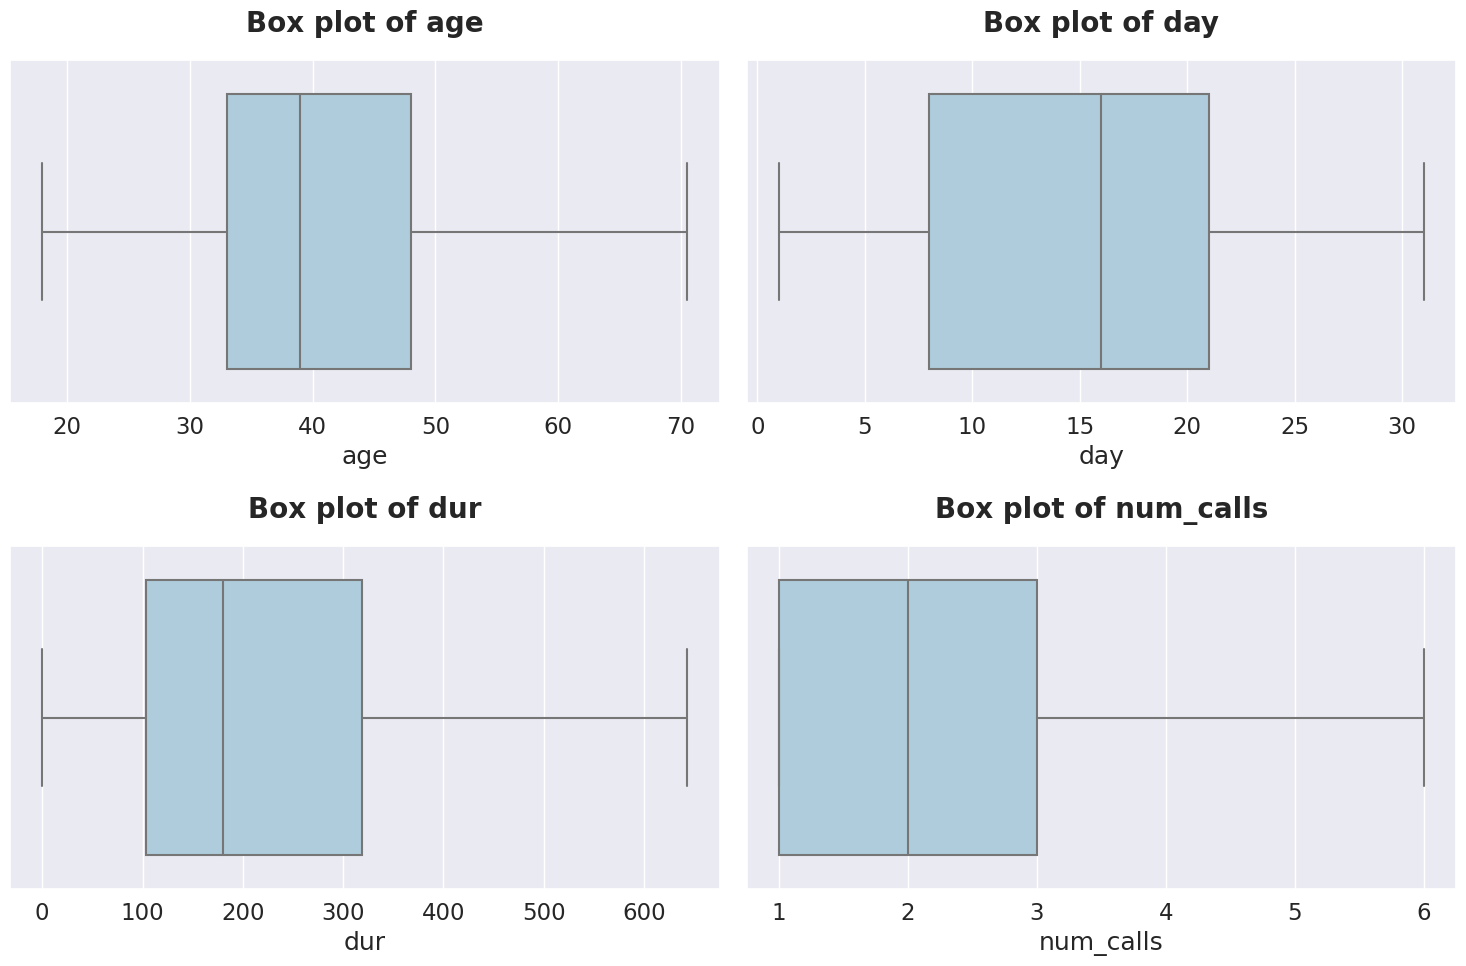

In [268]:
Boxplot(['age', 'day', 'dur', 'num_calls'])

In [269]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.869052,15.80688,234.95620,2.392235
std,10.395247,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,70.500000,31.00000,643.00000,6.000000


# **Exploratory Data Analysis (EDA)**

Target Variable ' y '

In [270]:
df['y'].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

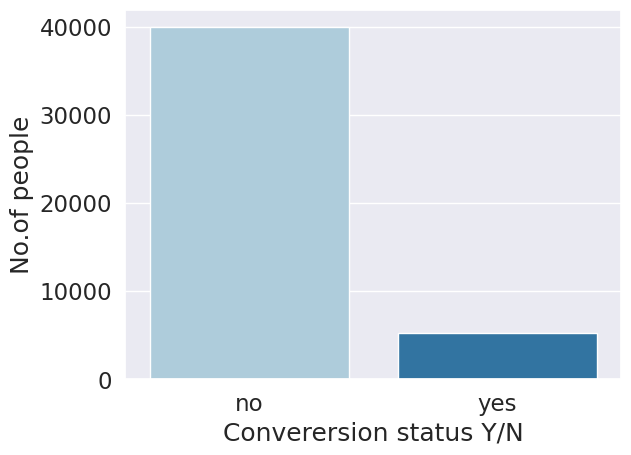

In [285]:
sns.countplot(x=df['y'],palette='Paired')
plt.xlabel('Converersion status Y/N')
plt.ylabel('No.of people')
plt.show()